In [1]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t as time
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve,least_squares,root

import sys, os

sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import custom_plot_objects as cpo

import ModelFramework as mf
import ModelFramework.Elements as ele
import ModelFramework.ExternalForces as ef
import FwtModels.RectWing as rw
import FwtModels.RollRig as RollRig
from tqdm import tqdm

from matplotlib.lines import Line2D

me.mechanics_printing()

In [2]:
df_fixed = pd.read_pickle('FixedData.pkl')
df_free = pd.read_pickle('FreeData.pkl')
df = pd.concat([df_fixed,df_free],axis=0)

In [3]:
df_fixed['Roll Rate']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
192187    5.600923
192188    5.600923
192189    5.600923
192190    5.600923
192191    5.600923
Name: Roll Rate, Length: 192192, dtype: float64

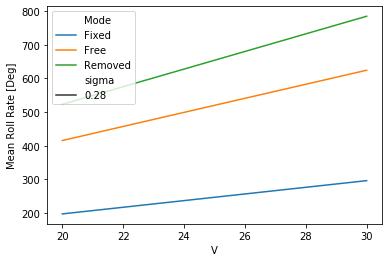

In [4]:
dat = df.copy()
#dat = dat[dat['sigma']==0.28]
dat = dat[dat['Lambda']==np.deg2rad(10)]
dat = dat[dat['eta_0']==np.deg2rad(0)]
dat = dat[dat['eta_1']==0]
dat = dat[dat['alpha_c']==np.deg2rad(0)]
dat = dat[dat['sigma']==0.28]
dat = dat[dat['V']>19]
dat = dat[dat['beta']==0.0037]
#dat = dat[(dat['eta']==np.deg2rad(0))|(dat['eta']==df['eta'].iloc[0])]
dat = dat[dat['t']>4]

test = dat.groupby(['Mode','Lambda','sigma','eta_0','eta_1','alpha_c','V'])['Roll Rate'].mean().reset_index()
#test= dat
test['Mean Roll Rate [Deg]'] = np.rad2deg(test['Roll Rate'])
test['Flare Angle [Deg]'] = pd.Categorical(np.round(np.rad2deg(test['Lambda']),2))
sns.lineplot(data=test,x='V',y='Mean Roll Rate [Deg]',hue='Mode',style='sigma')

In [15]:
#geom id
df['Geometry ID'] = df.groupby(['sigma','Lambda','eta_0','eta_1','alpha_c']).ngroup()
df['Attitude ID'] = df.groupby(['sigma','Lambda','eta_0','eta_1','alpha_c','beta','V']).ngroup()

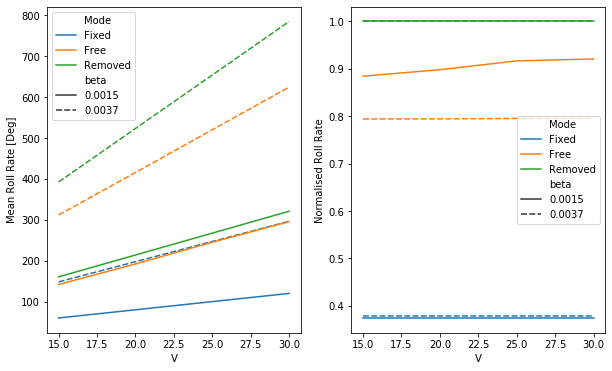

In [50]:
#geom id
df['Geometry ID'] = df.groupby(['sigma','Lambda','eta_0','eta_1','alpha_c']).ngroup()
df['Attitude ID'] = df.groupby(['sigma','Lambda','eta_0','eta_1','alpha_c','beta','V']).ngroup()


filter_dict = {'Lambda':np.deg2rad([10]),'eta_0':np.deg2rad([0]),'eta_1':[0],'alpha_c':np.deg2rad([0]),
              'sigma':[0.28],'beta':[0.0037]}


style = 'beta'
filter_dict.pop(style,None)
dat = cpo.GetReducedDataSet(df.copy(),filter_dict)
dat = dat[dat['t']>4]

test = dat.groupby(['Mode','Lambda','Attitude ID','sigma','eta_0','eta_1','alpha_c','beta','V'])[['Roll Rate','Left FWT Angle','Right FWT Angle']].mean().reset_index()
#test= dat

Norm_V =[]
for i in range(len(test)):
    att_id = test['Attitude ID'][i]
    norm_df = test[(test['Mode']=='Removed')&(test['Attitude ID']==att_id)].reset_index()['Roll Rate'][0]
    Norm_V.append(test['Roll Rate'][i]/norm_df)

test['Normalised Roll Rate'] = Norm_V
test['Mean Roll Rate [Deg]'] = np.rad2deg(test['Roll Rate'])
test[style] = pd.Categorical(test[style])
#test[style] = np.round(test[style],2)

fig, axes = plt.subplots(1,2,figsize=(10,6))
sns.lineplot(data=test,x='V',y='Mean Roll Rate [Deg]',hue='Mode',style=style,ax=axes[0])
sns.lineplot(data=test,x='V',y='Normalised Roll Rate',hue='Mode',style=style,ax=axes[1])


In [26]:
test.Lambda.unique()

[0.17, 0.35, 0.52]
Categories (3, float64): [0.17, 0.35, 0.52]

In [17]:
len(test)